# Task 2: Data Profiling, Cleaning & EDA  for benin.

##  📦 Import necessary packages 

In [2]:
# 📦 Import necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

# 📂 Load dataset
df = pd.read_csv("benin-malanville.csv")

# ✨ Show basic info
print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


## 📊 1. Summary Stats & Missing Values

In [3]:
# Summary statistics
df.describe()

# Missing values count
missing = df.isna().sum()
missing[missing > 0]

# Highlight columns with >5% nulls
null_percent = df.isna().mean() * 100
print("Columns with >5% nulls:")
print(null_percent[null_percent > 5])


Columns with >5% nulls:
Comments    100.0
dtype: float64


## ⚠️ 2. Outlier Detection & Cleaning

In [4]:
# Choose sensor columns
sensor_cols = ["GHI", "DNI", "DHI", "ModA", "ModB", "WS", "WSgust"]

# Compute Z-scores
z_scores = df[sensor_cols].apply(zscore)

# Flag outliers
outliers = (np.abs(z_scores) > 3)
print("Outlier count per column:")
print(outliers.sum())

# Fill missing with median
df[sensor_cols] = df[sensor_cols].fillna(df[sensor_cols].median())


Outlier count per column:
GHI         89
DNI          0
DHI       3738
ModA        27
ModB        63
WS        3109
WSgust    3500
dtype: int64


## 💾 Export Cleaned File (to ignored data/ folder)

In [6]:
# Save cleaned file
df.to_csv("data/benin_clean.csv", index=False)


## 📈 3. Time Series Plots

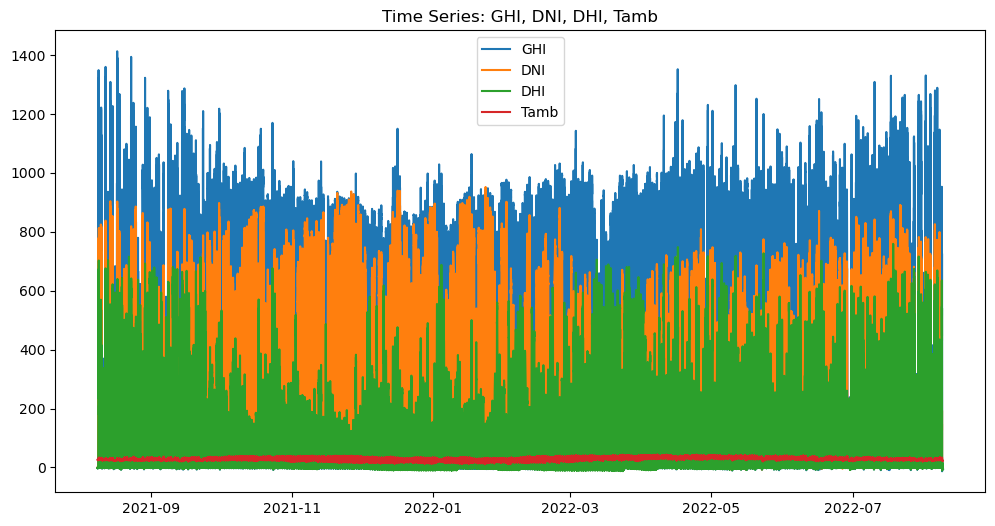

In [8]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Plot irradiance and temp
plt.figure(figsize=(12, 6))
for col in ['GHI', 'DNI', 'DHI', 'Tamb']:
    plt.plot(df['Timestamp'], df[col], label=col)
plt.legend()
plt.title("Time Series: GHI, DNI, DHI, Tamb")
plt.show()


## 🧽 4. Cleaning Impact on ModA/ModB

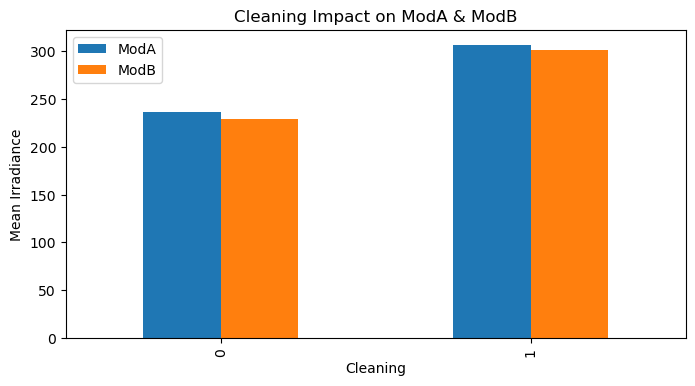

In [9]:
# Group by 'Cleaning' and compare ModA/ModB
if 'Cleaning' in df.columns:
    df.groupby("Cleaning")[["ModA", "ModB"]].mean().plot(kind='bar', figsize=(8, 4))
    plt.title("Cleaning Impact on ModA & ModB")
    plt.ylabel("Mean Irradiance")
    plt.show()


## 🔁 5. Correlation & Scatter Plots

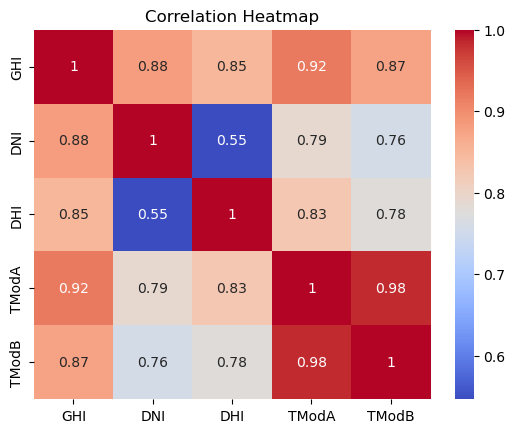

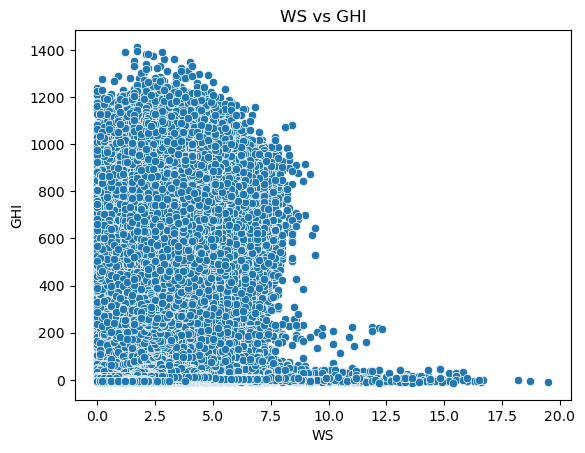

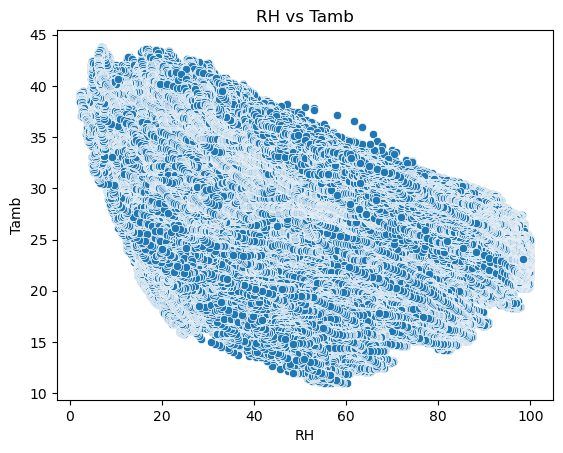

In [10]:
# Correlation heatmap
corr_cols = ["GHI", "DNI", "DHI", "TModA", "TModB"]
sns.heatmap(df[corr_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Scatter: WS vs GHI
sns.scatterplot(x="WS", y="GHI", data=df)
plt.title("WS vs GHI")
plt.show()

# Scatter: RH vs Tamb
sns.scatterplot(x="RH", y="Tamb", data=df)
plt.title("RH vs Tamb")
plt.show()


## 🌬️ 6. Wind & Distribution

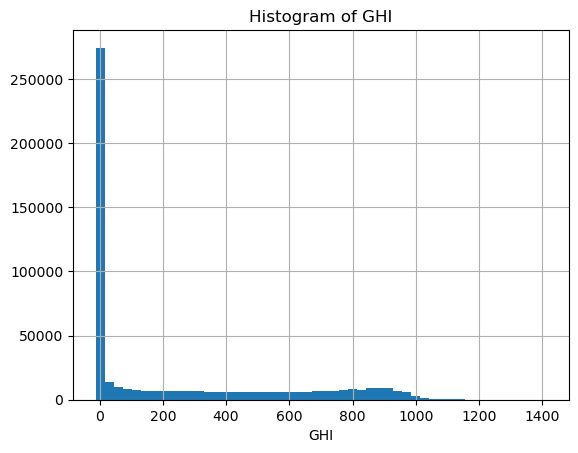

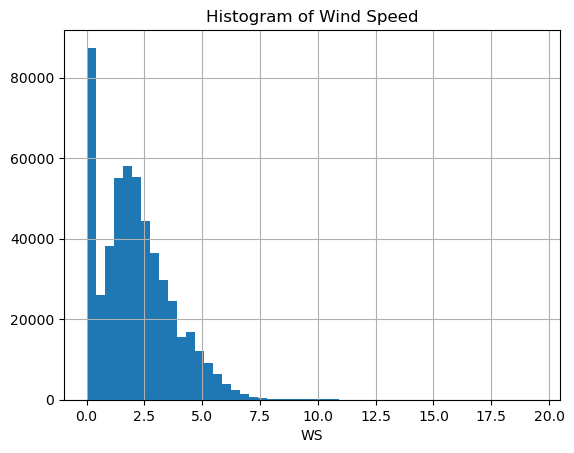

In [11]:
# Histogram
df['GHI'].hist(bins=50)
plt.title("Histogram of GHI")
plt.xlabel("GHI")
plt.show()

# Histogram of WS
df['WS'].hist(bins=50)
plt.title("Histogram of Wind Speed")
plt.xlabel("WS")
plt.show()


## 🌡️ 7. Temperature & Humidity Influence

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


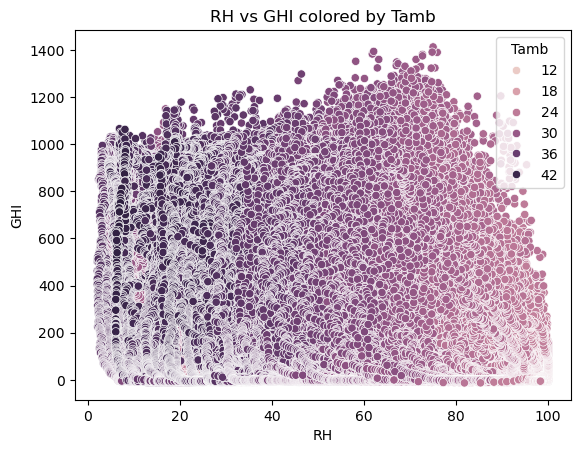

In [12]:
sns.scatterplot(x="RH", y="GHI", data=df, hue="Tamb")
plt.title("RH vs GHI colored by Tamb")
plt.show()


## 🔵 8. Bubble Chart

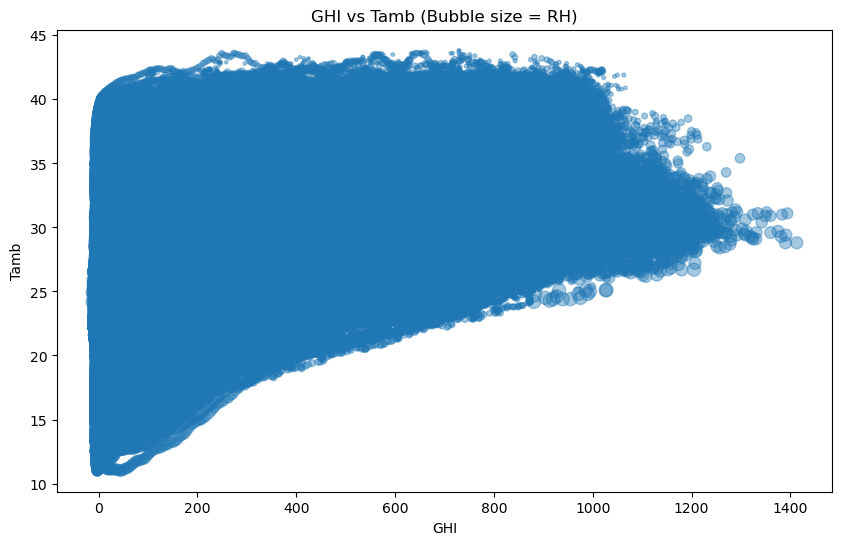

In [13]:
plt.figure(figsize=(10,6))
plt.scatter(df['GHI'], df['Tamb'], s=df['RH'], alpha=0.4)
plt.title("GHI vs Tamb (Bubble size = RH)")
plt.xlabel("GHI")
plt.ylabel("Tamb")
plt.show()
